# **Numpy Tutorial: EECS 16ML**
In this assignment, you will gain a familiarity with one of the most popular packages used in Machine Learning. Numpy (https://numpy.org) is used as a fundamental package to perform matrix calculations, linear algebra calculations, and also for optimizing regular number calculations. Let's begin exploring the world of numpy from the absolute basics.

## Introduction

First, you have to import the NumPy library as follows. We import some other libraries to aid with visualization.

In [26]:
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### **Creating Numpy Arrays**

The most basic object you can create in NumPy is a 1-dimensional NumPy array. We have created a normal Python list and compared their datatypes for you to see.

In [27]:
lst = [3,6,9,10]
arr = np.array([3,6,9,10])
type(lst), type(arr)

(list, numpy.ndarray)

We can create a matrix with Numpy by adding in multiple sub-arrays of equal length to the np.array argument. The number of sub-arrays and length of each  sub-array added will be the number of rows and number of columns, respectively, in the matrix.

We also check its shape to make sure it is a 2x2 array.

In [28]:
arr_2D = np.array([[3,6],
         [9,10]])
arr_2D, arr_2D.shape

(array([[ 3,  6],
        [ 9, 10]]), (2, 2))

We can convert a 1-dimensional NumPy array to a 2x2 matrix as follows. The arguments of reshape are (num_rows, num_columns). Obviously, num_rows * num_columns must equal to the length of the original array.

In [29]:
arr_mat = arr.reshape(2,2)
arr_mat, arr_mat.shape

(array([[ 3,  6],
        [ 9, 10]]), (2, 2))

We can also create a NumPy matrix directly without creating a 1-dimensional array and reshaping it.

We also check its shape to make sure it is a 2x2, as it is above.

In [30]:
arr_2D = np.array([[3,6],
         [9,10]])
arr_2D.shape

(2, 2)

### **Appending NumPy Arrays**

In many programming situations, you may have to append a value to a NumPy array. We will start with the simple example of appending an integer to the end of a 1-dimensional array.

In [31]:
arr = np.array([3,6,9,10])
arr = np.append(arr, 1)
arr

array([ 3,  6,  9, 10,  1])

We can also append an array (instead of just one value) to an existing array as follows.

In [32]:
arr = np.append(arr, [8, 0, 11])
arr

array([ 3,  6,  9, 10,  1,  8,  0, 11])

In linear algebra problems, you may need to append an array to a matrix (often iteratively). We will explore this later when discussing polynomial featurization. Here is one way of doing a simple append with np.append. You must specify the axis argument (axis = 0 in this case) since it shows whether you are adding the appended array row-wise or column-wise.

In [33]:
# making the 1x8 array from the previous example a 2x4 matrix
arr_2D = arr.reshape(2,4)
# appending a NumPy array (row) of length 4 to the bottom of the current 2x4 matrix
# specifying axis = 0 to add row-wise
arr_2D = np.append(arr_2D, [[3,4,10,500]], axis = 0)
arr_2D

array([[  3,   6,   9,  10],
       [  1,   8,   0,  11],
       [  3,   4,  10, 500]])

Appending rows or columns to matrices can also be done through the np.hstack and np.vstack functions, which stack arrays column-wise and row-wise respectively.

For example, in order to create a 1-dimensional array that consists of two different sub-arrays, we can use the np.hstack function (horizontally stacking the sub-arrays).

In order to confirm your understanding of modifying arrays and matrices with NumPy, please complete the following cells.

1) Create a 3x6 matrix with all integers from 1 to 18 in increasing order across the row.

In [34]:
# SOLUTION
x = range(1, 19)
X = np.array(x).reshape(3,6)
X

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18]])

2) Now, create a new matrix ($\verb|arr2|$) that has the same entries as the matrix above but with two more columns (same number of rows). Therefore, it should be a $3$x$8$ matrix. You can choose the entries of the two new columns to be whatever you like.

In [35]:
# SOLUTION
x1 = np.array([100, 200, 300]).reshape(3, 1)
x2 = np.array([400, 500, 600]).reshape(3, 1)
X = np.hstack((X, x1))
X = np.hstack((X, x2))
X

array([[  1,   2,   3,   4,   5,   6, 100, 400],
       [  7,   8,   9,  10,  11,  12, 200, 500],
       [ 13,  14,  15,  16,  17,  18, 300, 600]])

Now that we understand the basics of NumPy arrays (1-dimensional and matrices) and the various methods for appending values, rows, or columns to an array or matrix, we can move into actually using these data structures for computation in linear algebra problems.

Let's move to establishing an understanding of how to go from a state space to an array.

# State Space Representation Using Numpy
You are in a store, and you see customers besides you buying various fruits and vegetables. Due to Corona, you only have 5 minutes in the store. As a result, you want to know the prices of fruits and vegetables in the store by observing the orders of other individuals. Luckily, you have your computer with you, and can input the orders and prices of the orders that you see from other people. This way, you can use numpy, along with linear algebra techniques that you know, to solve for the price of the individual items. 

Here are the orders you see:
*   Alice: 2 oranges, 5 apples, 3 onions, 1 carrot, for $10.75

*   John: 4 oranges, 3 apples, 2 onions, 2 carrot, for $11.00 

*   Henry: 1 orange, 1 apple, 1 onion, 1 carrot, for $4.25

*   Peter: 6 oranges, 1 apple, 10 onions, 100 carrots, for $214.00




In [36]:
# create a matrix using np.array()
# Use inverses to solve for the value of each item

# YOUR CODE HERE

orders = np.array([[2,5,3,1], [4,3,2,2],[1,1,1,1],[6,1,10,100]])
order_costs = np.array([10.75, 11, 4.25, 214])
item_costs = np.linalg.inv(orders) @ order_costs
print(orders@item_costs)


# END CODE

[ 10.75  11.     4.25 214.  ]


Let's explore this a bit more in detail. Henry's order has now changed to the following: 


*   6 oranges, 8 apples, 5 onions, 3 carrots for $21.75

Modify and solve the problem to reflect this.


In [37]:
# modify the orders matrix
# modify the order_costs matrix
# solve for the new item_costs

#YOUR CODE HERE
orders[2] = [6,8,5,3]
order_costs[2] = 21.75
item_costs = np.linalg.inv(orders) @ order_costs
#END CODE

print(item_costs)


[ 1.34375 -8.      16.       0.875  ]


What do you observe? What does this mean? Why did this not happen in the first case?

HINT: Check the matrix inverse and determinant

We observe that the estimations for item_costs don't quite make sense-- costs cannot possibly be negative. When we look into the inverse, we see completely obscure values. The issue here is that the inverse does not actually exist, but with floating point arithmetic, the small round errors are amplified and seem to create a valid inverse. This is an important issue to look for! Always check the determinant of a matrix if your output seems suspicious after an inverse.

Shift Henry's order back to what it was initially. Now add Carl's order:


*   Carl: 6 oranges, 8 apples, 5 onions, 3 carrots for $21.75

Modify and solve the problem to reflect this



In [38]:
# modify the orders matrix
# modify the order_costs matrix
# solve for the new item_costs

#YOUR CODE HERE

orders[2] = [1,1,1,1]
order_costs[2] = 4.25
orders = np.vstack((orders, [6,8,5,3]))
np.append(order_costs, 21.75)


item_costs = np.linalg.inv(orders) @ order_costs
#END CODE

print(item_costs)

LinAlgError: ignored

What did you notice? Did you find a solution?
We notice that we do not find a solution to our problem because NumPy attempts to find the inverse of the matrix, which is non-square. Since this is impossible, we cannot find a solution

# **Benefits of Using Numpy**
So far, we have discussed the use of numpy to solve various linear algebra problems, to do matrix multiplication, and more. But what makes NumPy so special? After all, we can write the code necessary for matrix operations ourselves using loops and basic arithmetic.

In fact, let's compare the use of NumPy versus writing our own code in the context of matrix multiplication.


First, write prod(x,y), the product of two arrays, using coding techniques that you have learned from classes. 

In [39]:
def prod(x,y):
  '''Returns the product of x and y, two 2D arrays
     If the product cannot be returned for some reason,
     return None'''
  x = np.array(x)
  y = np.array(y)
  solution = np.zeros((x.shape[0],y.shape[1])) 
  if x.shape[1] != y.shape[0]:
    return None
  for i in range(x.shape[0]):
   # iterate through columns of Y
    for j in range(y.shape[1]):
       # iterate through rows of Y
       for k in range(y.shape[0]):
           solution[i][j] += x[i][k] * y[k][j]
  return solution


Now, write NumpyProd(x,y), the product of two arrays using NumPy. Instead of relying on NumPy to return errors when the product is not possible, account for errors and return None to maintain uniformity with prod.

In [40]:
def NumpyProd(x,y):
  '''Returns the product of x and y, two 2D arrays using NumPy
     If the product cannot be returned for some reason,
     return None'''
  return np.multiply(x,y)

In [41]:
# generate matrices to test runtimes
small_matrix1 = np.random.rand(10, 10)
small_matrix2 = np.random.rand(10, 10)
med_matrix1 = np.random.rand(100,100)
med_matrix2 = np.random.rand(100,100)
large_matrix1 = np.random.rand(10000, 10000)
small_matrix1 = small_matrix1.tolist()
med_matrix1 = med_matrix1.tolist()
small_matrix2 = small_matrix2.tolist()
med_matrix2 = med_matrix2.tolist()

In [42]:
t0 = time.clock()
p1 = prod(small_matrix1, small_matrix2)
print(time.time()-t0)
t0 = time.time()
p1alt = NumpyProd(small_matrix1, small_matrix2)
print(time.time()-t0)
assert(p1.all() == p1alt.all())

1606885256.7962687
0.00013709068298339844


In [43]:
t0 = time.clock()
p2 = prod(med_matrix1, med_matrix2)
print(time.time()-t0)
t0 = time.time()
p2alt = NumpyProd(med_matrix1, med_matrix2)
print(time.time()-t0)
assert(p2.all() == p2alt.all())

1606885258.4532192
0.0012640953063964844


# Use of np.einsum

1) Calculate the matrix product $AB$ with $\verb|np.einsum|$, as defined below.

In [46]:
# SOLUTION
A = np.arange(1, 22).reshape(7,3)
B = np.arange(1, 19).reshape(3,6)
np.einsum('ij, jk -> ik', A, B)

array([[ 54,  60,  66,  72,  78,  84],
       [117, 132, 147, 162, 177, 192],
       [180, 204, 228, 252, 276, 300],
       [243, 276, 309, 342, 375, 408],
       [306, 348, 390, 432, 474, 516],
       [369, 420, 471, 522, 573, 624],
       [432, 492, 552, 612, 672, 732]])

# Eigenvectors and Eigenvalues

Recall from EECS16A that an eigenvector x of a matrix A is defined as a vector for which Ax = λx. λ is known as an eigenvalue of A. 

Why is this so significant? Well, for one, we might seek to understand what happens when we multiply A^n *x. 

When we know x is an eigenvector of A, we can find A^nx by computing λ^n*x. 

Let's explore this concept a little bit using our friend, NumPy.

In [47]:
# This is the matrix A that you will be using in order to find A^nx. 
A = np.array([[2,5], [4,1]])
print(A)

[[2 5]
 [4 1]]


To find the eigenvalues and eigenvectors of A, We can use np.linalg.eig(A). This will return an array of eigenvalues, and a corresponding array of eigenvectors. Remember, the eigenvectors are arranged by **column**.

In [48]:
eigenvalues = None
eigenvectors = None

### YOUR CODE HERE

eigenvalues = np.linalg.eig(A)[0]
eigenvectors = np.linalg.eig(A)[1].T
### END CODE

Now, let's imagine that we want to compute A^n*x1, where x1 is our first eigenvector. How would we compute this?

In [49]:
n = 10

### YOUR CODE HERE
x1 = eigenvectors[0] # first eigenvector
# compute the nth power of x1.
x1n = eigenvalues[0]**(n) * x1 # A^n(x1)
# END CODE



In [50]:
# Compare this to simple matrix multiplication. Do the same operation without the use of the eigenvalue.
np.linalg.matrix_power(A, n)@x1

array([47216150.86469273, 37772920.69175418])

# Diagonalization
Recall from EECS16A that the existence of eigenvalues and eigenvectors in a matrix allows it to be diagonalized in the form VΛ(V^-1). Let's use NumPy to do this, as diagonalization is a very useful technique used in a variety of applications.

In order to do this, leverage the skills you have learned about. First find the eigenvalues and eigenvectors, then find the diagonal Λ matrix, and stack eigenvectors to obtain the V matrix.

In [51]:
def diagonalize(A):
  '''Return diagonal and V matrix'''
  eigenvalues = np.linalg.eig(A)[0]
  eigenvectors = np.linalg.eig(A)[1].T
  return np.diag(eigenvalues), eigenvectors


Good Job! By now, you should have a good idea with how to find eigenvalues and use diagonalization quickly using NumPy.

# Least Squares

In EECS16A, you should be able to recall the concept of least squares. Provided some data in an X matrix, and some y values associated with this data, the goal is to be able to predict a y value given the associated data.


To be clear, our goal is to find a vector w such that Xw = y.

It might seem obvious upon initial glance-- just multiply X^-1 on both sides to generate the w vector. However, what if X is not invertible? What if X has many more rows than columns? What if there is not a perfect solution w? Enter least squares. 

Least squares seeks to resolve the situation where there is no solution that may be simply achieved through matrix inverses. Let's look at this problem from the perspective of linear algebra. 


The problem of trying to find a w such that Xw = y is the same as trying to find the linear combination of X's column space that creates the vector y. In the event that y is not in the column space of X, however, we need to find the **best possible** value for w. The notion of the best possible value is given by the L-2 norm distance. In EECS16A, you found that this is the same as w = (A^T*A)^-1 * A^T * y

## Least Squares using NumPy

Let's go back to our example of buying fruits in the supermarket. Given the following data, try to create a prediction for the price of the vegetables and fruits:

*   Alice: 2 oranges, 5 apples, 3 onions, 1 carrot, for $10.75

*   John: 4 oranges, 3 apples, 2 onions, 2 carrot, for $11.00 

*   Henry: 1 orange, 1 apple, 1 onion, 1 carrot, for $4.25

*   Peter: 6 oranges, 1 apple, 10 onions, 100 carrots, for $214.00

*   Jose   6 oranges, 8 apples, 5 onions, 3 carrots for $20.75



In [52]:
### YOUR CODE HERE
X = np.array([[2,5,3,1], [4,3,2,2],[1,1,1,1],[6,1,10,100], [6,8,5,3]])
y = np.array([10.75, 11, 4.25, 214, 20.75])
w = np.linalg.inv(X.T@X)@X.T@y

### END CODE

Now that we have a solution w, let's find the ***error*** that we get from the y data. Error will be represented by the squared error of the L2 distance between your predicted y and the actual y.

In [53]:
def calculateError(pred_y, y):
  ### YOUR CODE HERE
  return np.mean(np.square(pred_y - y))
  # calculates the mean squared error between your prediction and the actual y

pred_y = X@w

print(calculateError(pred_y, y))
### END CODE



0.0666666666666669


It turns out that Numpy has a function that computes the least squares solution for you. The function is np.linalg.lstsq() which takes in the X-data and y as it's parameters. Try to use this function, and calculate the error that results.

NOTE: the first returned argument is the weight/coefficient vector.

In [54]:
### YOUR CODE HERE
w = np.linalg.lstsq(X,y)[0]
pred_y_np = X@w

print(calculateError(pred_y_np, y))

### END CODE


0.06666666666666643


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


## Polynomial Featurization

As you have seen before, one of the most common applications of computation with linear algebra tools is the least squares problem, which aims to minimize the squared norm of the distance between a linear projection of the features and the actual data points. The least squares problem is not limited to the 2-dimensional case in which we can visually see a **linear** relationship between x and y. Instead, if we believe the true model is non-linear, we create more "linear" features which are simply higher order polymomials of the current features. For example, if we have a list of $(x, y)$ coordinates, and our data looks roughly quadratic, we can create a new feature $x^2$, in addition to the existing **$1$** vector (intercept) and $x$ vector.

In [55]:
# data generation
x = np.linspace(-4.3, 4.3, 100)
true_y = 4 + 0.2 * x + x**2 + 0.8 * x**3 + 0.2 * x**4
noisy_y = true_y + np.random.normal(0, 10, 100)

In this case, running a simple linear regression of $y$ regressed on $x$ will not be of much help since the data is clearly non-linear. Therefore, we will hypothesize that the "true" data is generated from higher order polynomials, such as $x^2, x^3,$ and $x^4$.

The data looks quadratic, so our first hypothesis is that our data points $y$ are generated from the following model: $$y = w_0 + w_1 x + w_2 x^2 + \epsilon$$

Now that we have a hypothesis model, we can formulate the least squares optimization problem:

$$\underset{w}{min} ||Xw - y||^2$$ where $X$ is the feature matrix with a **$1$**'s column, an **$x$** column, and an **$x^2$** column, and $w$ is the vector of coefficients $\begin{bmatrix}
w_0 \\
w_1 \\
w_2
\end{bmatrix}$.

As you recalled above, the least squares solution to the least squares optimization is $\hat{w_{LS}} = (X^T X)^{-1} X^T y$. We already have the values $y$, stored in $\verb|noisy_y|$. We will use our newly acquired NumPy appending skills to create a feature matrix $X$ with the features described above.

There are many ways to do this. We demonstrate just one way that can also be generalized to polynomials of degree $d$. 

Print the first three rows to verify that the entries are correct.

In [56]:
n = len(noisy_y)
deg = 2
X = np.empty([n, deg + 1])
for d in range(deg + 1):
  X_curr_deg = np.array(x ** d)
  X[:, d] = X_curr_deg


In [57]:
# SOLUTION
print(X[:3, ])

[[ 1.         -4.3        18.49      ]
 [ 1.         -4.21313131 17.75047546]
 [ 1.         -4.12626263 17.02604326]]


Now we can compute $\hat{w_{LS}}$ with the formula from above. Before doing this, write a function $\verb|LstSq|$ that has arguments $X$ and $y$ and returns the least squares solution $\hat{w_{LS}}$ from above.

In [58]:
# SOLUTION
def LstSq(X,y):
  return np.linalg.inv(X.T @ X) @ X.T @ y

After computing $\hat{w_{LS}}$, we will compute the predicted $\hat{y}$ values to see the quality of the fit when compared to noisy_y. Recall that we can compute the predictions with $\hat{y} = X\hat{w_{LS}}$.

In [59]:
# SOLUTION
w_LS = LstSq(X, noisy_y)
y_hat = X @ w_LS

Use the $\verb|calculateError|$ function to compute the MSE of our predictions.

In [60]:
# SOLUTION
calculateError(y_hat, noisy_y)

196.67136714610362

Our next step is to add some higher-dimensional features to see if they reveal something about our underlying true distribution. First, write a function $\verb|featurize_d|$ that returns a NumPy matrix $X$ with all features from $x^0...x^d$ as separate columns for some degree $d$. The function's arguments should be the original data vector $x$ and our desired degree $d$.

The caveat: you cannot copy the format from above. Instead, you must use NumPy (any functions within NumPy are okay).

In [61]:
# SOLUTION
def featurize_d(x, d):
  n = len(x)
  X = np.empty([n, d + 1])
  for de in range(d + 1):
    X_curr_deg = np.array(x ** de)
    X[:, de] = X_curr_deg
  return X

Now, add a column to $X$ with the entires $x^3$. Obtain the coefficients $w$, the predictions $\hat{y}$, and the MSE. Print the coefficients and observe what has happened. Repeat the exercise with $x^4$ (keeping $x^3$). 

In [62]:
# SOLUTION
X_deg3 = featurize_d(x, 3)
w_deg3 = LstSq(X_deg3, noisy_y)
y_pred_deg3 = X_deg3 @ w_deg3
MSE_deg3 = calculateError(y_pred_deg3, noisy_y)
print(w_deg3, MSE_deg3)

[-5.1199807   1.45373543  4.52845333  0.71932795] 117.3724692130383


In [63]:
# SOLUTION
X_deg4 = featurize_d(x, 4)
w_deg4 = LstSq(X_deg4, noisy_y)
y_pred_deg4 = X_deg4 @ w_deg4
MSE_deg4 = calculateError(y_pred_deg4, noisy_y)
print(w_deg4, MSE_deg4)

[-0.07391946  1.45373543  1.85216912  0.71932795  0.16557728] 97.27389356567332


#### "Tradeoff" of Using Higher-Order Polynomials

You now understand the motivation to add more higher-dimensional polynomial features. However, adding too many features when the data is generated from a true lower-dimensional polynomial can signficantly increase the MSE.

In the cell below, generate 100 equally spaced $x$ values between $-5$ and $5$ using $\verb|np.linspace|$. Then generate a "true" output $y$ using the linear function $y = 3x + 2$. After obtaining $y$, create a variable $\verb|y_noisy|$ where $y_{noisy} = y + \epsilon$. We assume $\epsilon \sim N(\mu = 0, \sigma^2 = 2).$ In order to get $\epsilon$, you can use the function $\verb|np.random.normal|$.

Visualize your generated data points with the provided code. Be sure to check that your variable names match up with the variable names we provide for visualization.

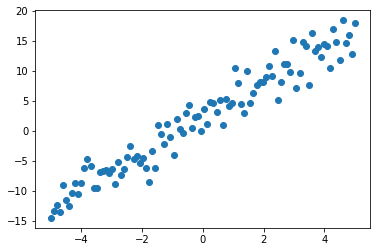

In [64]:
# SOLUTION
x = np.linspace(-5, 5, 100)
y = 3 * x + 2
y_noisy = y + np.random.normal(0, 2, 100)

plt.plot(x, y_noisy, 'o')

Now, find the least squares coefficients asssuming our hypothesis is that $y = w_0 + w_1 x + \epsilon$. Verify that the coefficients make sense given our current problem setup.

In [65]:
# SOLUTION
X_deg1 = featurize_d(x, 1)
w_deg1 = LstSq(X_deg1, y_noisy)
print(w_deg1)

[2.20155383 2.92939199]


Your friend that has not studied statistics believes you should add some more polynomial features to try and decrease the MSE of the model.

Create a feature matrix up to $x^2$ and find the least squares solution with the new features. What do you notice about the coefficient for $x^2$? What do you conclude to your friend? What do you think will happen if you add $x^4, x^5$, etc?

In [66]:
# SOLUTION
X_deg2 = featurize_d(x, 2)
w_deg2 = LstSq(X_deg2, y_noisy)
print(w_deg2)

[ 2.40699918  2.92939199 -0.02416526]


#### "Linear" Classification for a Conic Section

We have built some basic linear models for linear and quadratic data. Sometimes, instead of predicting the output $y$ directly, we may have binary "labels" attached to $y$ indicating whether a certain condition has been met or not. Run the cell below to see the data in tabular form.

In [67]:
# generating 1's
r = 2
theta = np.random.uniform(0, 2*np.pi, 100)
x_1 = r * np.cos(theta) + np.random.normal(0, 0.1, 100)
y_1 = r * np.sin(theta) + np.random.normal(0, 0.1, 100)
# generating 0's
x_0 = np.append(np.linspace(-r-2, -r, 100), np.linspace(r, r+2, 100))
y_0 = 0.1*x_0**2 + 1 + np.random.normal(0, 1.5, 200)
# appending everything
x_all = np.append(x_1, x_0)
y_all = np.append(y_1, y_0)
labels_all = np.append(np.ones(100), -1 * np.ones(200))
dat = pd.DataFrame({'x':x_all, 'y':y_all, 'label': labels_all}).sample(frac = 1)
dat.reset_index(drop=True, inplace=True)
dat

,x,y,label
0,2.686869,2.876985,-1.0
1,2.767677,1.477013,-1.0
2,-2.050731,0.860444,1.0
3,0.290767,-1.967723,1.0
4,-2.565657,3.386404,-1.0
...,...,...,...
295,-3.515152,1.185910,-1.0
296,0.148069,-1.938880,1.0
297,3.070707,1.165852,-1.0
298,-1.806016,0.437432,1.0


Now, visualize the $(x,y)$ coordinates of the above dataset. $\verb|x_0, y_0|$ are $x, y$ values for label -1 and $\verb|x_1, y_1|$ are the $x,y$ values for label 1.

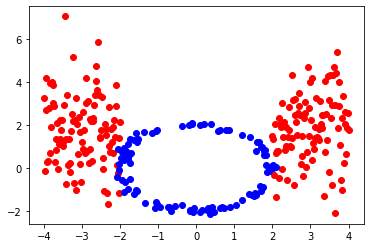

In [68]:
plt.plot(x_0, y_0, 'o', color = 'red')
plt.plot(x_1, y_1, 'o', color = 'blue')

What shape does the blue data (label 1) look like? Do you see a clear separation?

Based on the shape of the data, construct a feature matrix that seems reasonable. What parameters will we be estimating? Hint: the equation of a circle in conic form is $ (x-h)^2 + (y-k)^2 = r^2$. We are attempting to predict the label, stored in $\verb|dat['label']|$.


In [69]:
# SOLUTION
# we want a column of 1's, x, y, x^2, y^2
X = np.zeros((300, 5))
ones = np.ones(300)
x_sq = x_all ** 2
y_sq = y_all ** 2
X[:, 0] = ones
X[:, 1] = x_all
X[:, 2] = y_all
X[:, 3] = x_sq
X[:, 4] = y_sq
X

array([[ 1.00000000e+00, -1.91270408e+00,  9.11960980e-01,
         3.65843688e+00,  8.31672828e-01],
       [ 1.00000000e+00, -1.05346376e-01,  2.06810767e+00,
         1.10978589e-02,  4.27706933e+00],
       [ 1.00000000e+00, -1.57569522e+00, -1.03276038e+00,
         2.48281542e+00,  1.06659400e+00],
       ...,
       [ 1.00000000e+00,  3.95959596e+00,  1.84273967e+00,
         1.56784002e+01,  3.39568950e+00],
       [ 1.00000000e+00,  3.97979798e+00,  2.55313542e+00,
         1.58387920e+01,  6.51850048e+00],
       [ 1.00000000e+00,  4.00000000e+00,  1.75831370e+00,
         1.60000000e+01,  3.09166706e+00]])